# 4.10 Intacart Final Task

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Assign path
path = r"D:\0 - Data Analytics\4 - Python fundamentals for Data Analysts\Instacart Basket Analisys"

# Importing dataframes
ords_prods_cust = pd.read_pickle(
    os.path.join(path, "02 Data", "Prepared Data", "ords_prods_customers_merged_V1.pkl")
)

In [2]:
# check the dataframe
ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,annual_income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## 2 - Consider any security implications that might exist for this new data. <br> You’ll need to address any PII data in the data before continuing your analysis.


As i previously mentioned there are columns with names, last  adn other sensible inforamtion. <br>
We could erase the names becasue they are not really useful for our analysis.

## 3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. <br> Create a regional segmentation of the data.

In [3]:
# Define the mapping of states to regions
state_to_region = {
    # Northeast
    "Connecticut": "Northeast",
    "Maine": "Northeast",
    "Massachusetts": "Northeast",
    "New Hampshire": "Northeast",
    "Rhode Island": "Northeast",
    "Vermont": "Northeast",
    "New Jersey": "Northeast",
    "New York": "Northeast",
    "Pennsylvania": "Northeast",
    # Midwest
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Missouri": "Midwest",
    "Nebraska": "Midwest",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "South Dakota": "Midwest",
    "Wisconsin": "Midwest",
    # South
    "Alabama": "South",
    "Arkansas": "South",
    "Delaware": "South",
    "District of Columbia": "South",
    "Florida": "South",
    "Georgia": "South",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maryland": "South",
    "Mississippi": "South",
    "North Carolina": "South",
    "Oklahoma": "South",
    "South Carolina": "South",
    "Tennessee": "South",
    "Texas": "South",
    "Virginia": "South",
    "West Virginia": "South",
    # West
    "Alaska": "West",
    "Arizona": "West",
    "California": "West",
    "Colorado": "West",
    "Hawaii": "West",
    "Idaho": "West",
    "Montana": "West",
    "Nevada": "West",
    "New Mexico": "West",
    "Oregon": "West",
    "Utah": "West",
    "Washington": "West",
    "Wyoming": "West",
}

# Add a new 'Region' column to the DataFrame
ords_prods_cust["region"] = ords_prods_cust["state"].map(state_to_region)


In [4]:
# check the dataframe with only "state" and "region" columns
ords_prods_cust[["state", "region"]].head(50)

,state,region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South
5,Alabama,South
6,Alabama,South
7,Alabama,South
8,Alabama,South
9,Alabama,South


In [5]:
# Determining the spending habits per region (cross with spending flag)
crosstab = pd.crosstab(
    ords_prods_cust["region"], ords_prods_cust["spending_flag"], dropna=False
)


In [6]:
# copy to clipboard
crosstab.to_clipboard()

### Spending Habit Observations
* The Midwest leads in the percentage of high spenders, despite having fewer total customers than the South and West.
* The Northeast has both the lowest number of total customers and the lowest percentage of high spenders.
* The South has the highest total number of customers but does not lead in high spenders' percentage.
* The West shows a fairly average high spender percentage.

In [7]:
# exporting the new dataframe in pkl as V2
ords_prods_cust.to_pickle(
    os.path.join(path, "02 Data", "Prepared Data", "ords_prods_customers_merged_V2.pkl")
)

## 4 - The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. <br> Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. <br> Make sure you export this sample.

In [8]:
# create exlusion flag for low and high activity customers
ords_prods_cust.loc[ords_prods_cust["max_order"] >= 5, "activity_flag"] = (
    "High Activity"
)
ords_prods_cust.loc[ords_prods_cust["max_order"] < 5, "activity_flag"] = "Low Activity"

In [9]:
# check the dataframe for value count of new flag
ords_prods_cust["activity_flag"].value_counts()

activity_flag
High Activity    30964564
Low Activity      1440295
Name: count, dtype: int64

In [10]:
# exclude the low activity customers
ords_prods_cust_excluded = ords_prods_cust[
    ords_prods_cust["activity_flag"] == "High Activity"
]

In [11]:
# make value count of new flag
ords_prods_cust_excluded["activity_flag"].value_counts()

activity_flag
High Activity    30964564
Name: count, dtype: int64

In [12]:
# Export the new dataframe with excluded low activity customers
ords_prods_cust_excluded.to_pickle(
    os.path.join(
        path, "02 Data", "Prepared Data", "ords_prods_customers_merged_excluded_V1.pkl"
    )
)

## 4.5 - Import department in the dataframe

In [13]:
# import department_wrangled
department_wrangled = pd.read_csv(
    os.path.join(path, "02 Data", "Prepared Data", "department_wrangled.csv")
)
# check the dataframe
department_wrangled.head(100)
# rename the column Unnamed: 0 to department_id
department_wrangled.rename(columns={"Unnamed: 0": "department_id"}, inplace=True)
department_wrangled.head()
# Merge the department_wrangled dataframe with ords_prods_cust_excluded
ords_prods_cust_excluded = ords_prods_cust_excluded.merge(
    department_wrangled, on="department_id", how="left"
)
# check the merged flag value count
ords_prods_cust_excluded["department"].value_counts()

# Export the dataframe with the merged department
ords_prods_cust_excluded.to_pickle(
    os.path.join(
        path,
        "02 Data",
        "Prepared Data",
        "ords_prods_customers_department_merged_excluded_V1.pkl",
    )
)

## 5 - 6 - 8  The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. <br> Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. <br> Create appropriate visualizations. <br> Compare your customer profiles with regions and departments. <br> Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.


### Create dependants flag


In [46]:
# check the number of dependants column counting the values
ords_prods_cust_excluded["number_of_dependants"].value_counts()
# Since the groups are almost identical in size I choose to divide in 2 groups no dependants and dependants
ords_prods_cust_excluded.loc[
    ords_prods_cust_excluded["number_of_dependants"] == 0, "dependants_group"
] = "no_dependants"
ords_prods_cust_excluded.loc[
    ords_prods_cust_excluded["number_of_dependants"] > 0, "dependants_group"
] = "dependants"

### Create time flag

In [47]:
# create age groups for customers

ords_prods_cust_excluded.loc[ords_prods_cust_excluded["age"] < 25, "age_group"] = (
    "young_adult"
)
ords_prods_cust_excluded.loc[
    (ords_prods_cust_excluded["age"] >= 25) & (ords_prods_cust_excluded["age"] < 45),
    "age_group",
] = "adult"
ords_prods_cust_excluded.loc[
    (ords_prods_cust_excluded["age"] >= 45) & (ords_prods_cust_excluded["age"] < 65),
    "age_group",
] = "middle_aged"
ords_prods_cust_excluded.loc[ords_prods_cust_excluded["age"] >= 65, "age_group"] = (
    "senior"
)


In [48]:
# check value count of new column
ords_prods_cust_excluded["age_group"].value_counts()

age_group
middle_aged    9690051
adult          9663775
senior         8195544
young_adult    3415194
Name: count, dtype: int64

### Create income flag

* Low-income -> less than $55,000 annually.
* Middle-income -> between $55,000 and $150,000 annually.
* High-income -> more than $150,000 annually. 
<br>

In [49]:
# create groups for income
ords_prods_cust_excluded.loc[
    ords_prods_cust_excluded["annual_income"] <= 55000, "income_group"
] = "low_income"
ords_prods_cust_excluded.loc[
    (ords_prods_cust_excluded["annual_income"] > 55000)
    & (ords_prods_cust_excluded["annual_income"] <= 150000),
    "income_group",
] = "middle_income"
ords_prods_cust_excluded.loc[
    ords_prods_cust_excluded["annual_income"] > 150000, "income_group"
] = "high_income"

# check tyher value count of new column
ords_prods_cust_excluded["income_group"].value_counts()

income_group
middle_income    22617642
low_income        4452388
high_income       3894534
Name: count, dtype: int64

### Sales per department

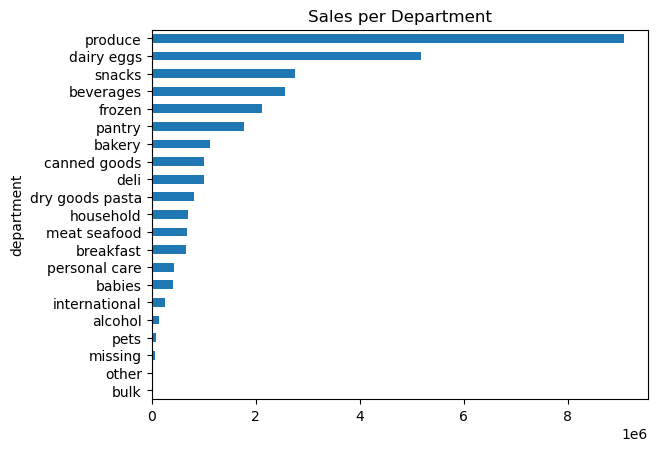

In [50]:
# make a horizontal bar chart habing the distribution of orders per department, with the bigger bar on top
sales_department = (
    ords_prods_cust_excluded["department"]
    .value_counts()
    .sort_values(ascending=True)  # Sort so the biggest bar is on top
    .plot.barh(title="Sales per Department")
)

In [51]:
# export the bar chart
sales_department.figure.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "sales_department_bar_chart.png"
    )
)

### Age

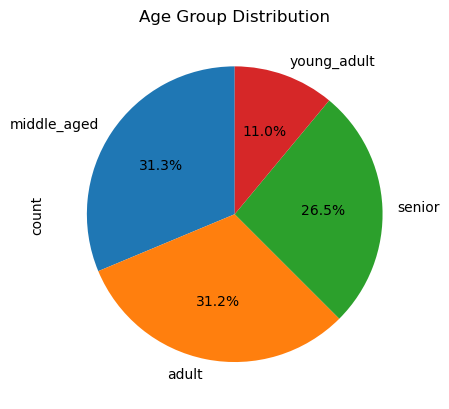

In [52]:
# create a pie chart visualization of age groups
age_group = (
    ords_prods_cust_excluded["age_group"]
    .value_counts()
    .plot.pie(autopct="%1.1f%%", startangle=90, title="Age Group Distribution")
)


In [53]:
# export the pie chart
age_group.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "age_group_pie_chart.png")
)

#### Age vs time of shopping

#### Loyalty flag x age group

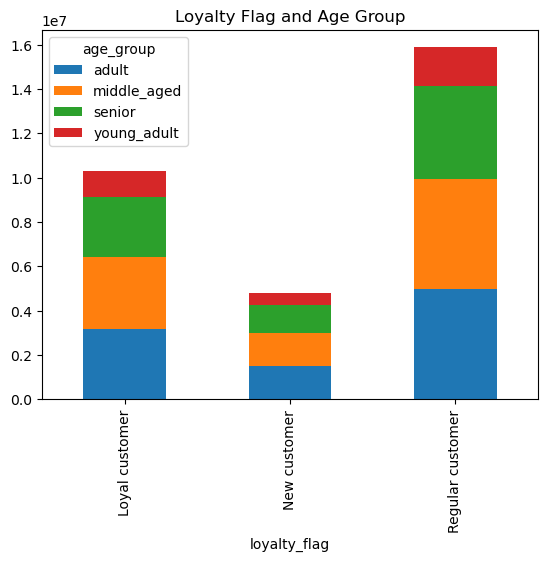

In [54]:
# make a bar chart crossing loyalty flag and age group
loyalty_age = pd.crosstab(
    ords_prods_cust_excluded["loyalty_flag"],
    ords_prods_cust_excluded["age_group"],
    dropna=False,
).plot.bar(stacked=True, title="Loyalty Flag and Age Group")

In [55]:
# export the bar chart
loyalty_age.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "loyalty_age_bar_chart.png")
)

#### Age vs department

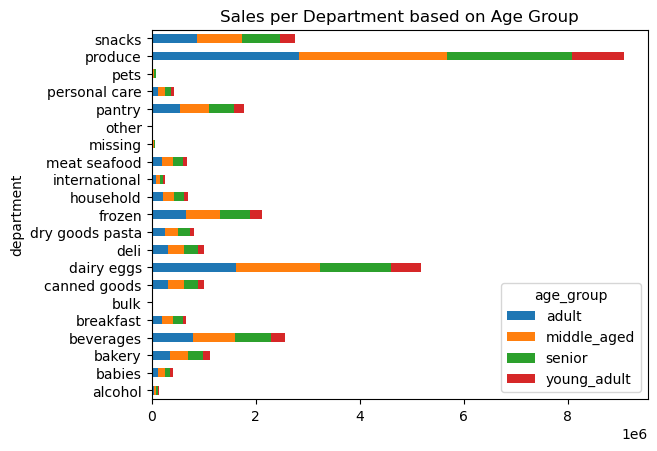

In [56]:
# make a horizontal bar chart habing the distribution of sales per department based on age group
sales_department_age = pd.crosstab(
    ords_prods_cust_excluded["department"], ords_prods_cust_excluded["age_group"]
).plot.barh(stacked=True, title="Sales per Department based on Age Group")


In [57]:
# export the bar chart
sales_department_age.figure.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "sales_department_age_bar_chart.png"
    )
)

### Orders per department

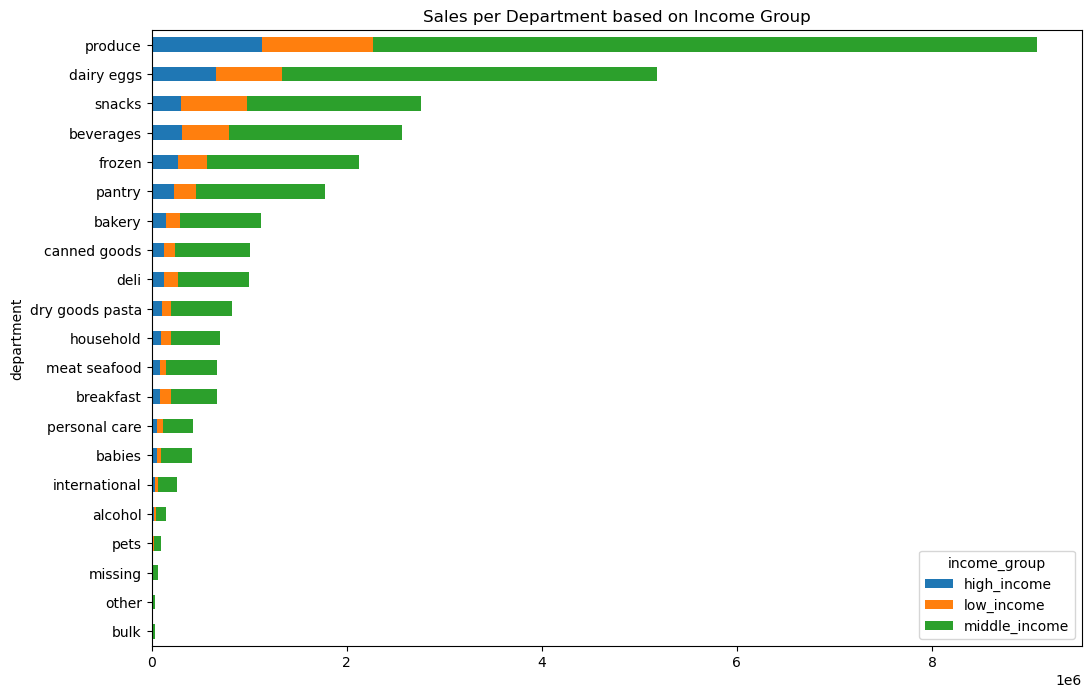

In [58]:
# Create crosstab
sales_department_income = pd.crosstab(
    ords_prods_cust_excluded["department"], ords_prods_cust_excluded["income_group"]
)

# Sort by total spending across all income groups in ascending order
sales_department_income = sales_department_income.loc[
    sales_department_income.sum(axis=1).sort_values().index
]

# Plot a horizontal bar chart
ax = sales_department_income.plot.barh(
    stacked=True, figsize=(12, 8), title="Sales per Department based on Income Group"
)

# Ensure the directory exists before saving
output_path = os.path.join(path, "04 Analysis", "Visualizations")
os.makedirs(output_path, exist_ok=True)

# Use `ax.figure.savefig()` instead of `sales_department_income.figure.savefig()`
ax.figure.savefig(os.path.join(output_path, "sales_department_income_bar_chart.png"))

# Show the plot
plt.show()


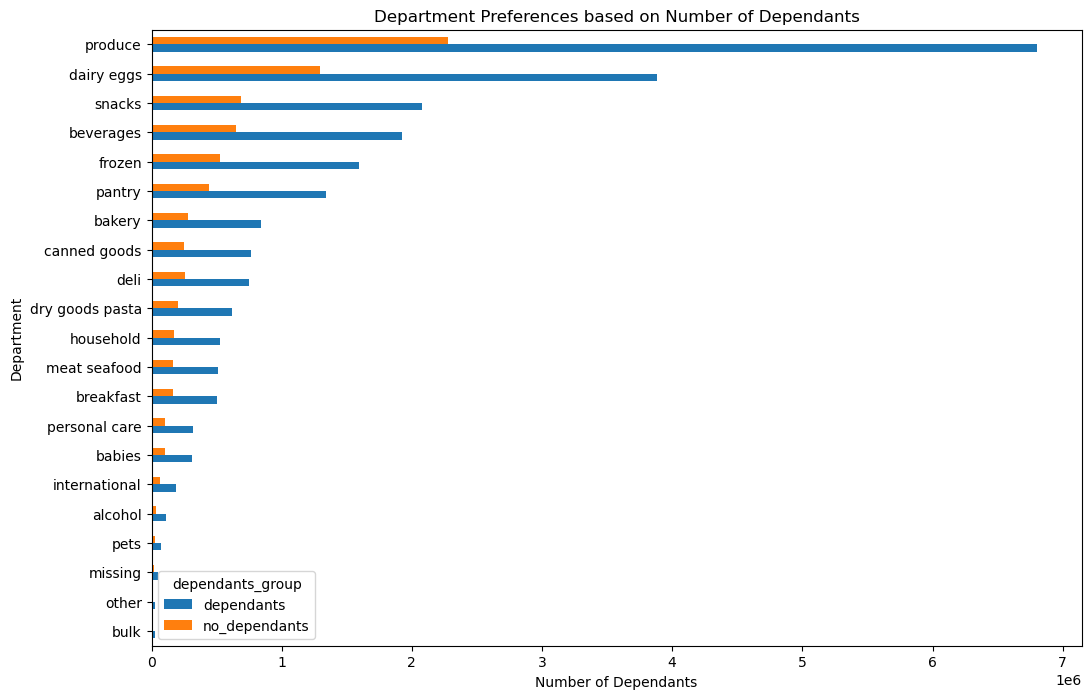

In [59]:
# Create crosstab
dept_dependants = pd.crosstab(
    ords_prods_cust_excluded["department"], ords_prods_cust_excluded["dependants_group"]
)

# Sort by total number of dependants per department (sum of all columns)
dept_dependants = dept_dependants.loc[dept_dependants.sum(axis=1).sort_values().index]

# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a horizontal bar chart
dept_dependants.plot.barh(
    stacked=False, ax=ax, title="Department Preferences based on Number of Dependants"
)

# Labels and styling
ax.set_xlabel("Number of Dependants")
ax.set_ylabel("Department")

# Ensure directory exists before saving
output_path = os.path.join(path, "04 Analysis", "Visualizations")
os.makedirs(output_path, exist_ok=True)

# Export the bar chart
fig.savefig(os.path.join(output_path, "dept_dependants_bar_chart.png"))

# Show the plot
plt.show()

### Distribution of price x department

Text(0, 0.5, 'Frequency')

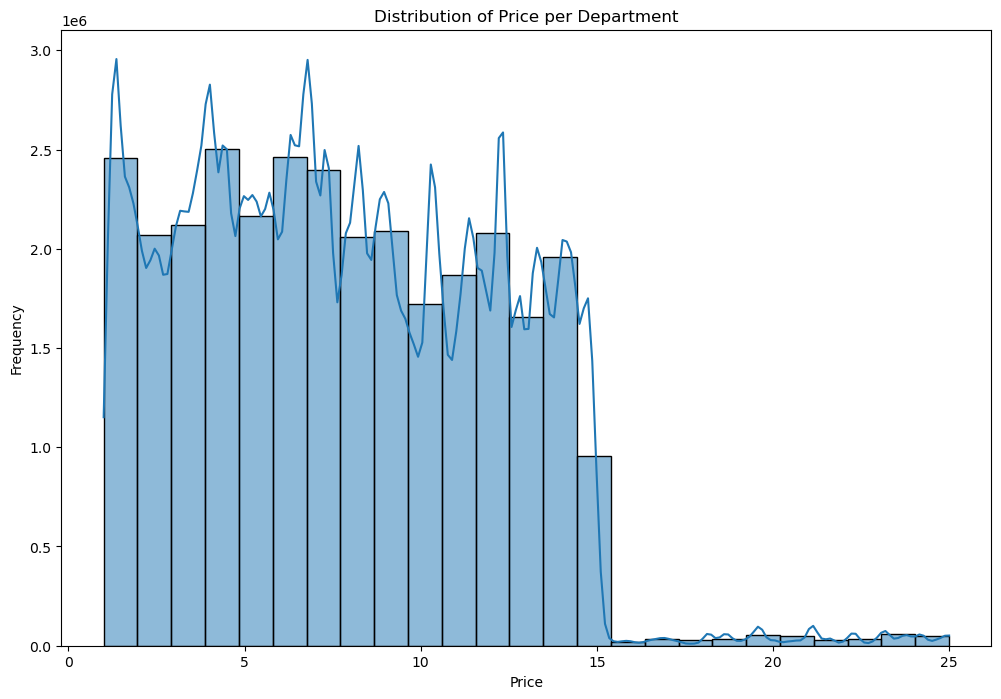

In [60]:
# Histogram showing the distribution of price per department
plt.figure(figsize=(12, 8))
sns.histplot(ords_prods_cust_excluded["prices"], bins=25, kde=True)
plt.title("Distribution of Price per Department")
plt.xlabel("Price")
plt.ylabel("Frequency")


In [61]:
# export the histogram\
plt.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "price_distribution_histogram.png"
    )
)

<Figure size 640x480 with 0 Axes>

### Orders by days of week

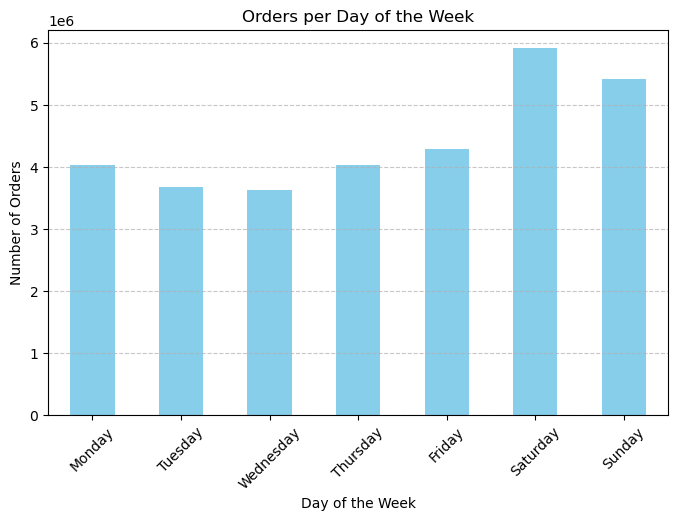

In [62]:
# Orders x days of the week
# make like 0 isaturday, 1 sunday, 2 monday, 3 tuesday, 4 wednesday, 5 thursday, 6 friday
# save it in a new variable df_ords_days

df_ords_days = ords_prods_cust_excluded["orders_day_of_week"] = (
    ords_prods_cust_excluded["orders_day_of_week"].replace(
        {
            0: "Saturday",
            1: "Sunday",
            2: "Monday",
            3: "Tuesday",
            4: "Wednesday",
            5: "Thursday",
            6: "Friday",
        }
    )
)
# Define the correct order for days of the week
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# Count values and reorder them
orders_per_day = (
    ords_prods_cust_excluded["orders_day_of_week"]
    .value_counts()
    .reindex(day_order, fill_value=0)
)

# Plot the bar chart
plt.figure(figsize=(8, 5))
ax = orders_per_day.plot(
    kind="bar", title="Orders per Day of the Week", color="skyblue"
)

plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Ensure directory exists
output_dir = os.path.join(path, "04 Analysis", "Visualizations")
os.makedirs(output_dir, exist_ok=True)

# Save the figure explicitly
plt.gcf().savefig(os.path.join(output_dir, "orders_per_day.png"))

# Show the plot
plt.show()


### Busiest hours of the day

Text(0, 0.5, 'Frequency')

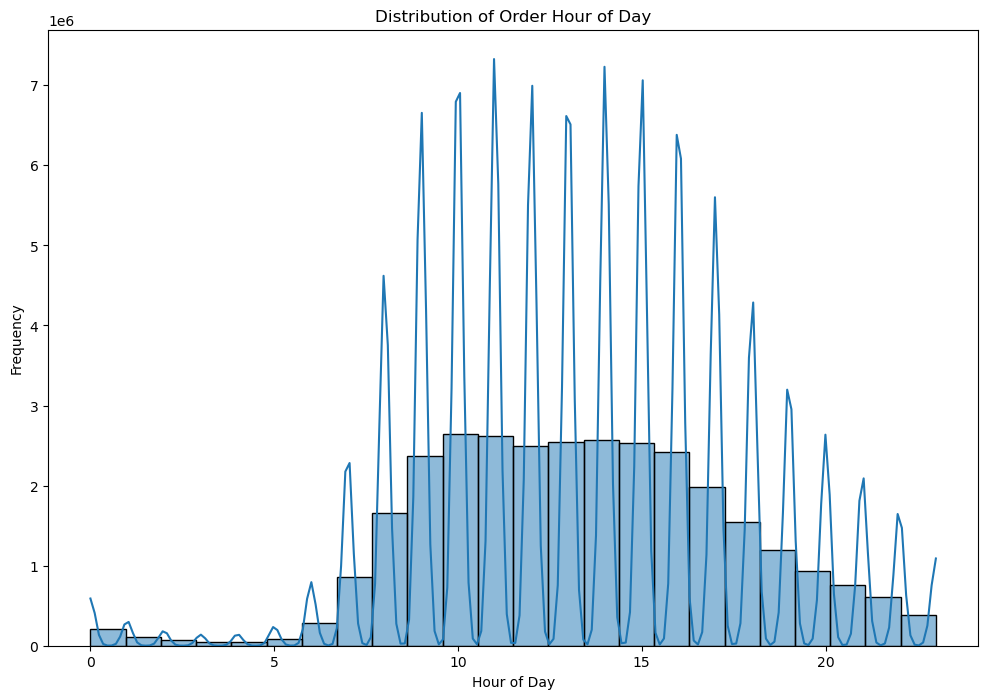

In [63]:
# make a histogram showing the distribution of order hour of day
plt.figure(figsize=(12, 8))
sns.histplot(ords_prods_cust_excluded["order_hour_of_day"], bins=24, kde=True)
plt.title("Distribution of Order Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")


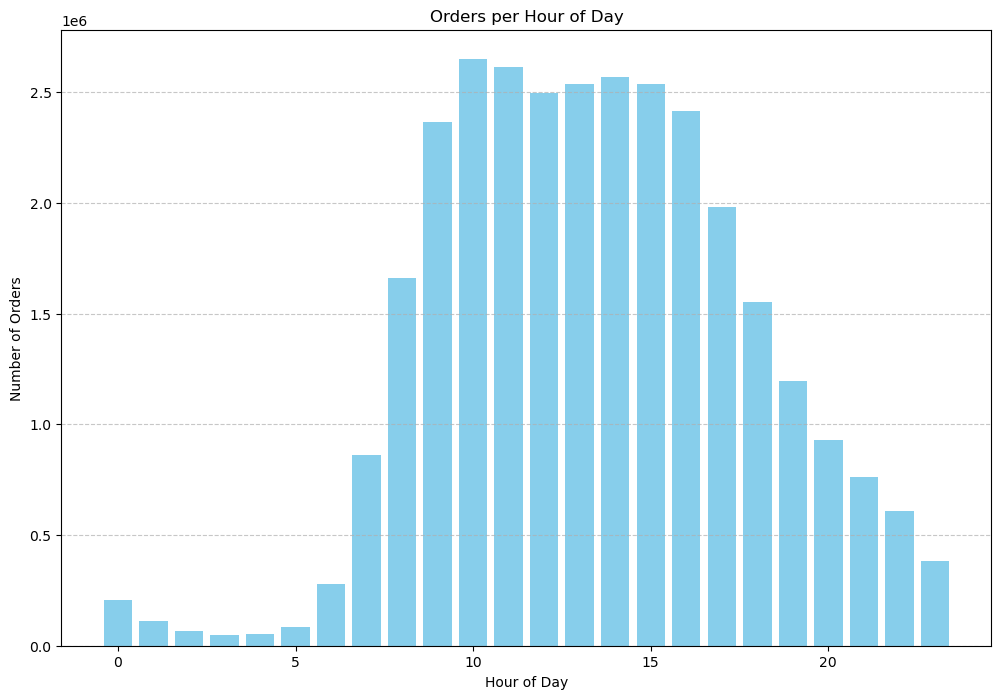

In [64]:
# make also a bar chart showing the distribution of orders per hour of day, keep the column attached to each other
orders_per_hour = (
    ords_prods_cust_excluded["order_hour_of_day"].value_counts().sort_index()
)
plt.figure(figsize=(12, 8))
plt.bar(orders_per_hour.index, orders_per_hour.values, color="skyblue")
plt.title("Orders per Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.grid(axis="y", linestyle="--", alpha=0.7)


# export the bar chart
plt.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "orders_per_hour_bar_chart_2.png"
    )
)

### Income

#### Income vs time of shopping

In [65]:
# create flag based on order time of day, morning, afternoon, evening, night
ords_prods_cust_excluded.loc[
    (ords_prods_cust_excluded["order_hour_of_day"] >= 6)
    & (ords_prods_cust_excluded["order_hour_of_day"] < 12),
    "time_of_day_flag",
] = "morning"
ords_prods_cust_excluded.loc[
    (ords_prods_cust_excluded["order_hour_of_day"] >= 12)
    & (ords_prods_cust_excluded["order_hour_of_day"] < 18),
    "time_of_day_flag",
] = "afternoon"
ords_prods_cust_excluded.loc[
    (ords_prods_cust_excluded["order_hour_of_day"] >= 18)
    & (ords_prods_cust_excluded["order_hour_of_day"] < 24),
    "time_of_day_flag",
] = "evening"
ords_prods_cust_excluded.loc[
    (ords_prods_cust_excluded["order_hour_of_day"] >= 0)
    & (ords_prods_cust_excluded["order_hour_of_day"] < 6),
    "time_of_day_flag",
] = "night"

In [66]:
# check the flag value count
ords_prods_cust_excluded["time_of_day_flag"].value_counts()

time_of_day_flag
afternoon    14534966
morning      10431571
evening       5430696
night          567331
Name: count, dtype: int64

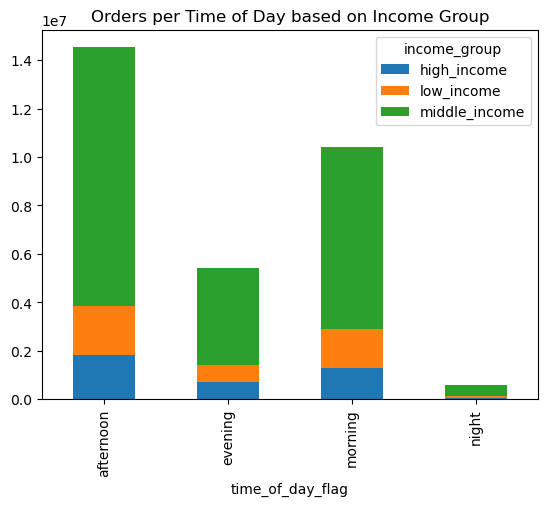

In [67]:
# bar chart showing the distribution of orders based on time of day by income group
time_of_day_income = pd.crosstab(
    ords_prods_cust_excluded["time_of_day_flag"],
    ords_prods_cust_excluded["income_group"],
).plot.bar(stacked=True, title="Orders per Time of Day based on Income Group")

In [68]:
# export the bar chart
time_of_day_income.figure.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "time_of_day_income_bar_chart.png"
    )
)

#### Income by dependant

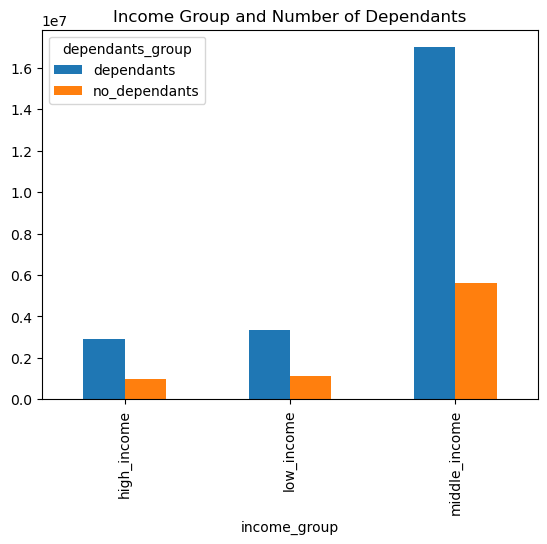

In [69]:
# side by side bar chart crossing income with number of dependants,
income_dependants = pd.crosstab(
    ords_prods_cust_excluded["income_group"],
    ords_prods_cust_excluded["dependants_group"],
    dropna=False,
).plot.bar(stacked=False, title="Income Group and Number of Dependants")


In [70]:
# export the bar chart
income_dependants.figure.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "income_dependants_bar_chart.png"
    )
)

#### Income by gender

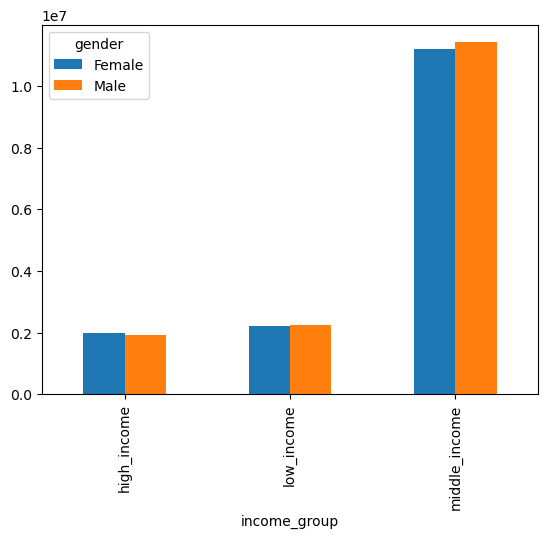

In [71]:
# bar chart crossing income classes and gender
income_gender_cross_bar = pd.crosstab(
    ords_prods_cust_excluded["income_group"],
    ords_prods_cust_excluded["gender"],
    dropna=False,
).plot.bar()


In [72]:
# export the bar chart
income_gender_cross_bar.figure.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "income_gender_cross_bar_chart.png"
    )
)


#### Income and product preferencies by region

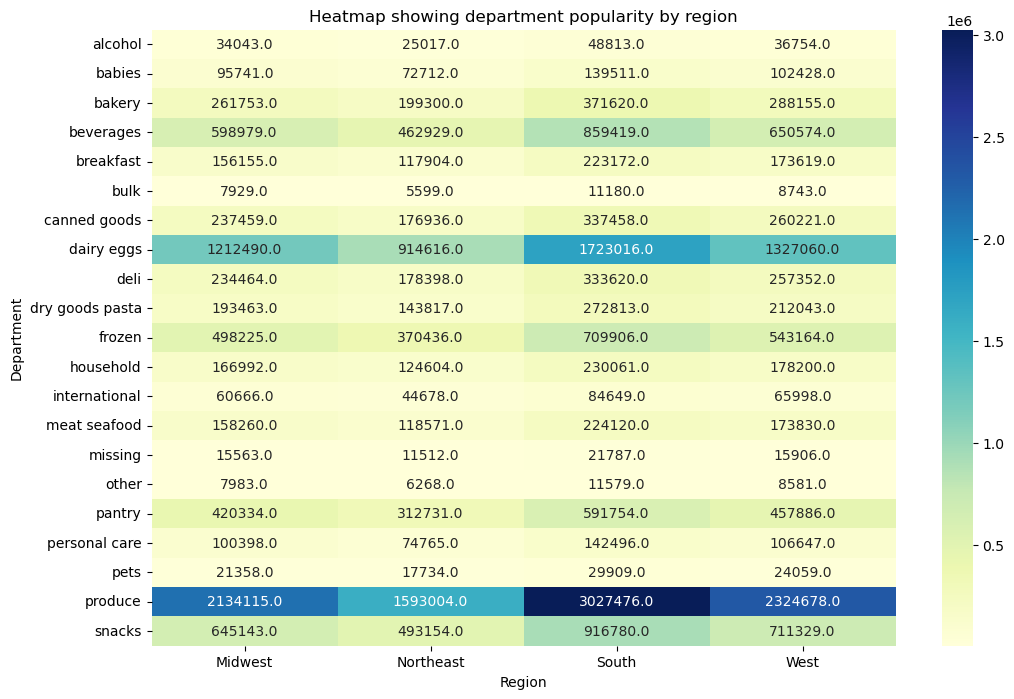

In [73]:
# Heatmap showing department popularity by region
# Aggregate the data to get department popularity by region
dept_region_popularity = (
    ords_prods_cust_excluded.groupby(["department", "region"])["order_number"]
    .count()
    .reset_index()
)

# Pivot the data to create a matrix suitable for a heatmap
dept_region_pivot = dept_region_popularity.pivot_table(
    index="department", columns="region", values="order_number", fill_value=0
)

# use seaborn to create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dept_region_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Heatmap showing department popularity by region")
plt.xlabel("Region")
plt.ylabel("Department")
plt.show()

In [74]:
# export the heatmap
plt.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "dept_region_heatmap.png")
)

<Figure size 640x480 with 0 Axes>

### Loyalty


#### Loyalty by region

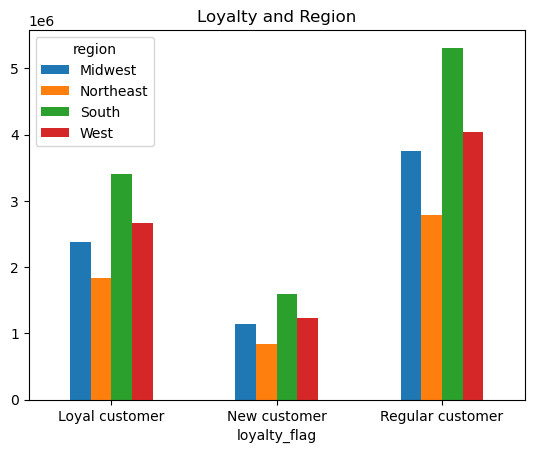

In [75]:
# bar chart loyalty x region
loyalty_region = pd.crosstab(
    ords_prods_cust_excluded["loyalty_flag"], ords_prods_cust_excluded["region"]
).plot.bar(stacked=False, title="Loyalty and Region")

# Make x-axis labels horizontal
plt.xticks(rotation=0)


# export it
loyalty_region.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "loyalty_region_bar_chart.png")
)

#### Loyalty by Income group

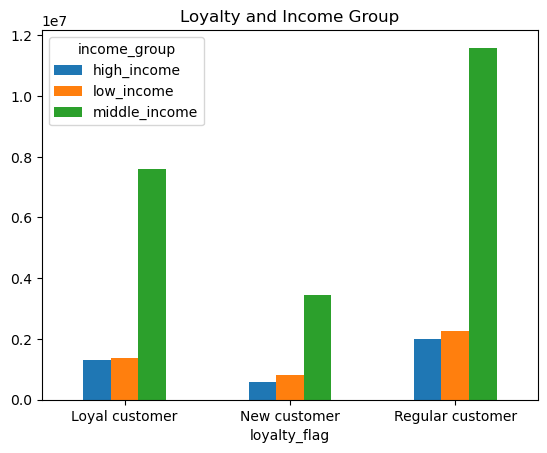

In [76]:
# bar charrt loyalty flag and income group
loyalty_income = pd.crosstab(
    ords_prods_cust_excluded["loyalty_flag"], ords_prods_cust_excluded["income_group"]
).plot.bar(stacked=False, title="Loyalty and Income Group")

# Make x-axis labels horizontal
plt.xticks(rotation=0)

# export the bar chart
loyalty_income.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "loyalty_income_bar_chart.png")
)


#### Loyalty by age group

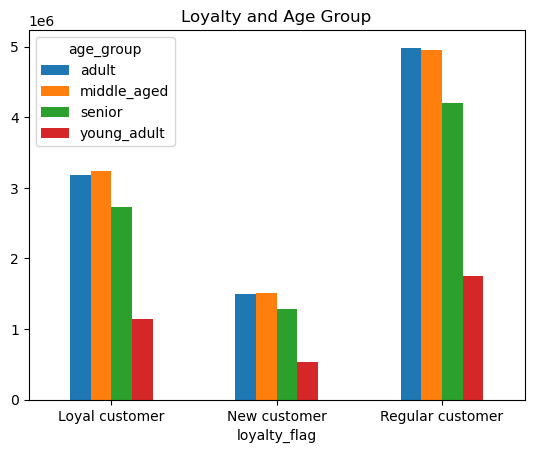

In [77]:
# bar chart loyalty by age group
loyalty_age = pd.crosstab(
    ords_prods_cust_excluded["loyalty_flag"], ords_prods_cust_excluded["age_group"]
).plot.bar(stacked=False, title="Loyalty and Age Group")

# Make x-axis labels horizontal
plt.xticks(rotation=0)

# export it
loyalty_age.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "loyalty_age_bar_chart.png")
)

#### Loyalty by gender

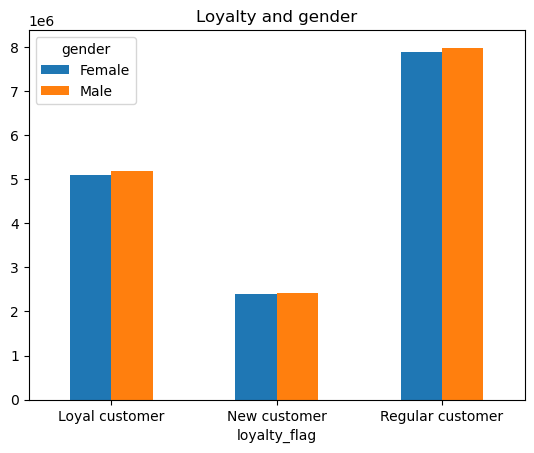

In [78]:
# bar chart loyalty by gender
loyalty_gender = pd.crosstab(
    ords_prods_cust_excluded["loyalty_flag"], ords_prods_cust_excluded["gender"]
).plot.bar(stacked=False, title="Loyalty and gender")

# Make x-axis labels horizontal
plt.xticks(rotation=0)

# export it
loyalty_gender.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "loyalty_gender_bar_chart.png")
)


#### Loyalty by spending flag

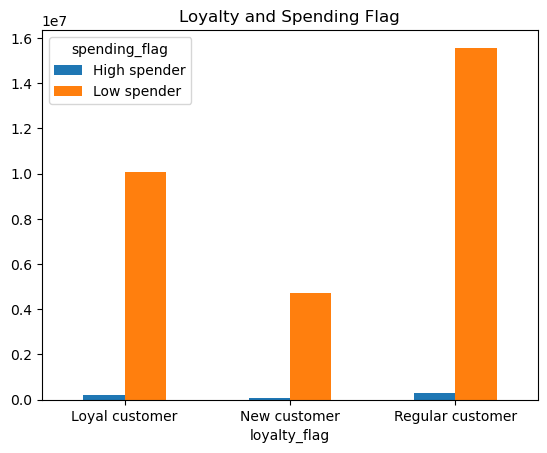

In [79]:
# bar chart loyalty by spending flag
loyalty_spending = pd.crosstab(
    ords_prods_cust_excluded["loyalty_flag"], ords_prods_cust_excluded["spending_flag"]
).plot.bar(stacked=False, title="Loyalty and Spending Flag")

# Make x-axis labels horizontal
plt.xticks(rotation=0)

# export the bar chart
loyalty_spending.figure.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "loyalty_spending_bar_chart.png"
    )
)

#### Loyalty by family status

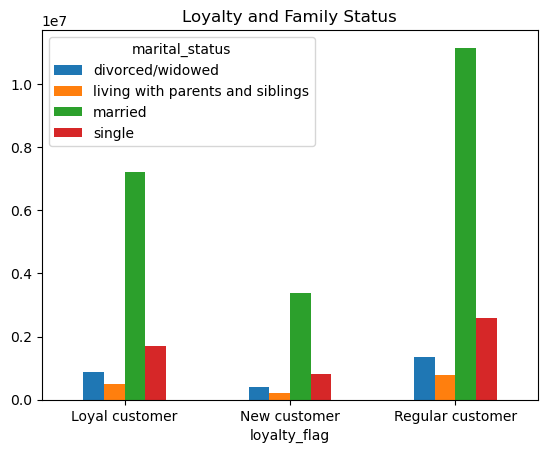

In [80]:
# non satcked abr chart loyalty x family status
loyalty_family = pd.crosstab(
    ords_prods_cust_excluded["loyalty_flag"], ords_prods_cust_excluded["marital_status"]
).plot.bar(stacked=False, title="Loyalty and Family Status")

# Make x-axis labels horizontal
plt.xticks(rotation=0)

# Export the bar chart
loyalty_family.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "loyalty_family_bar_chart.png")
)

#### Loyalty by Dependants status


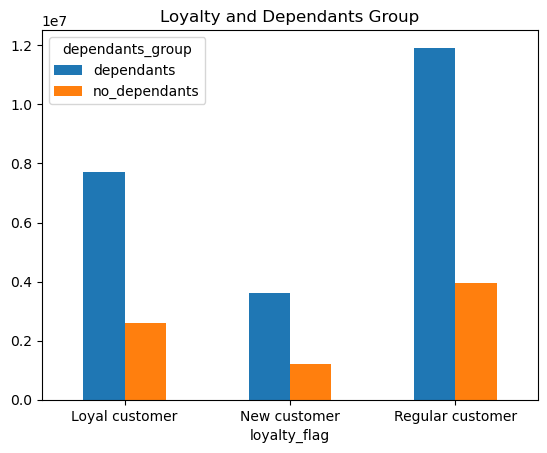

In [81]:
# non stacked bar chart loyalty x dependants group
loyalty_dependants = pd.crosstab(
    ords_prods_cust_excluded["loyalty_flag"],
    ords_prods_cust_excluded["dependants_group"],
).plot.bar(stacked=False, title="Loyalty and Dependants Group")

# Make x-axis labels horizontal
plt.xticks(rotation=0)

# Export the bar chart
loyalty_dependants.figure.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "loyalty_dependants_bar_chart.png"
    )
)

### Region

#### Region x spending flag

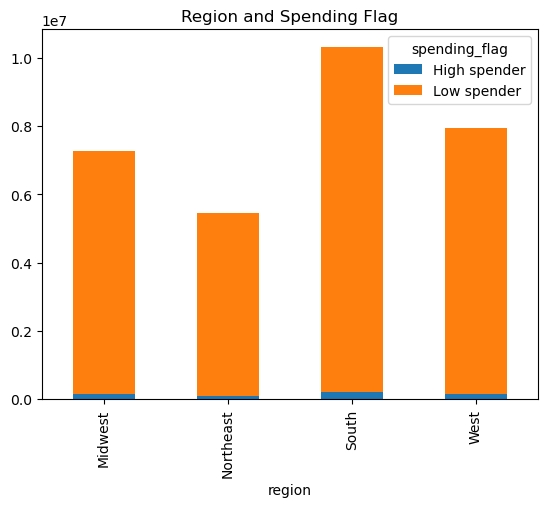

In [82]:
# make a bar chart crossing region and spending flag
region_spending = pd.crosstab(
    ords_prods_cust_excluded["region"],
    ords_prods_cust_excluded["spending_flag"],
    dropna=False,
).plot.bar(stacked=True, title="Region and Spending Flag")

In [83]:
# export the bar chart
region_spending.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "region_spending_bar_chart.png")
)

#### Region x Income

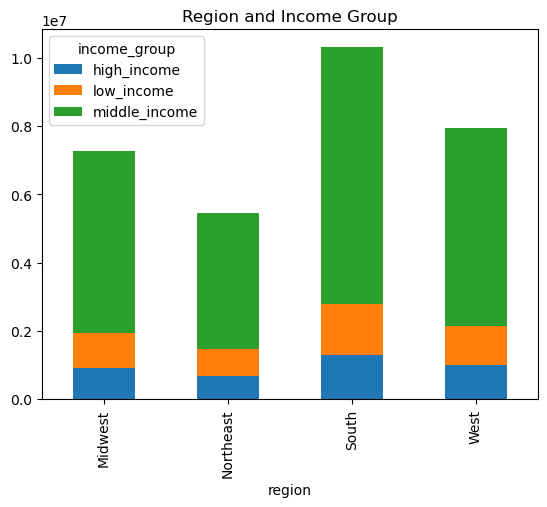

In [84]:
# make a bar chart crossing region and Income group
region_income = pd.crosstab(
    ords_prods_cust_excluded["region"],
    ords_prods_cust_excluded["income_group"],
    dropna=False,
).plot.bar(stacked=True, title="Region and Income Group")

In [85]:
# export the bar chart
region_income.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "region_income_bar_chart.png")
)

#### Region x age group

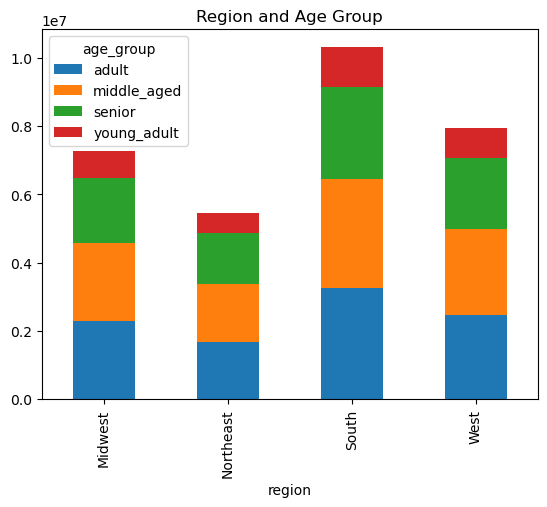

In [86]:
# make a bar chart crossing region and Age group
region_age = pd.crosstab(
    ords_prods_cust_excluded["region"],
    ords_prods_cust_excluded["age_group"],
    dropna=False,
).plot.bar(stacked=True, title="Region and Age Group")

In [87]:
# export the bar chart
region_age.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "region_age_bar_chart.png")
)

#### Region x dependents


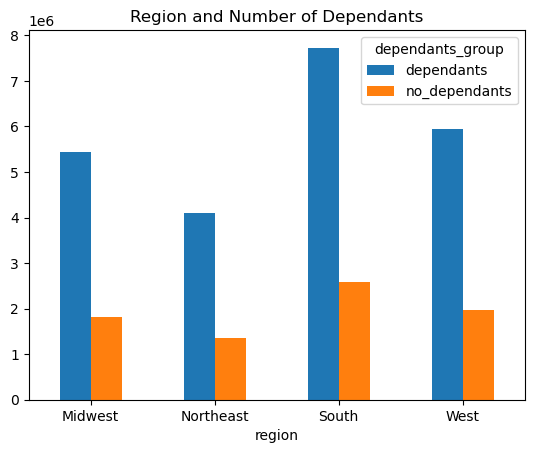

In [88]:
# bar chart crossing region with number of depoenants
region_dependants = pd.crosstab(
    ords_prods_cust_excluded["region"], ords_prods_cust_excluded["dependants_group"]
).plot.bar(stacked=False, title="Region and Number of Dependants")

# Make x-axis labels horizontal
plt.xticks(rotation=0)

# export the bar chart
region_dependants.figure.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "region_dependants_bar_chart.png"
    )
)


#### Region x spending
Do it again with the new dataframe

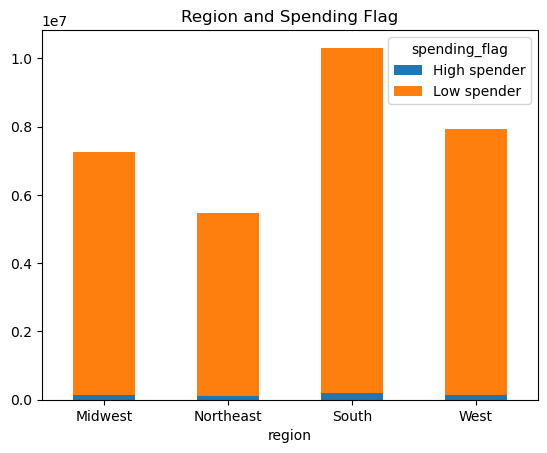

In [89]:
# make a bar chart crossing region and spending flag with region on x axis and stacked bar with high and low spender in y axis
region_spending = pd.crosstab(
    ords_prods_cust_excluded["region"],
    ords_prods_cust_excluded["spending_flag"],
    dropna=False,
).plot.bar(stacked=True, title="Region and Spending Flag")

# Make x-axis labels horizontal
plt.xticks(rotation=0)

# export the bar chart
region_spending.figure.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "region_spending_bar_chart_excluded.png"
    )
)

#### region x order day of the week

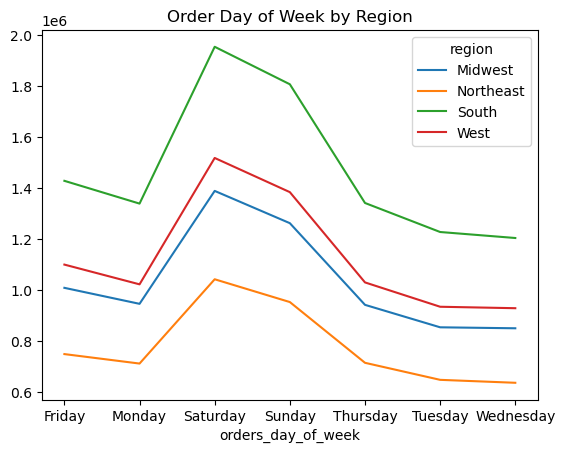

In [90]:
# create line chart showing order day of week by region
order_day_region = pd.crosstab(
    ords_prods_cust_excluded["orders_day_of_week"], ords_prods_cust_excluded["region"]
).plot.line(title="Order Day of Week by Region")

# Make x-axis labels horizontal
plt.xticks(rotation=0)

# Export the line chart
order_day_region.figure.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "order_day_region_line_chart.png"
    )
)

#### Department sales per region

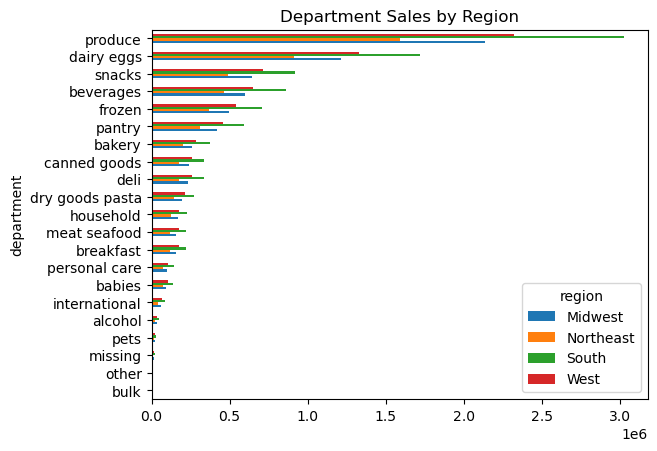

In [91]:
# Horizontal bar chart department sales by region
dept_region = (
    pd.crosstab(
        ords_prods_cust_excluded["department"], ords_prods_cust_excluded["region"]
    )
    .loc[  # Sort departments by total sales (sum of all regions)
        lambda df: df.sum(axis=1).sort_values().index
    ]
    .plot.barh(stacked=False, title="Department Sales by Region")
)

# Export the bar chart
dept_region.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "dept_region_bar_chart.png")
)

### Demographics

#### Distribution income|

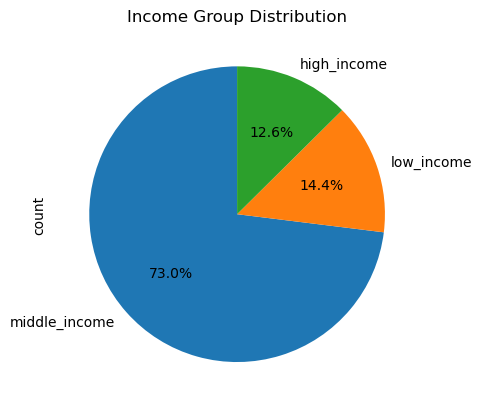

In [92]:
# create a pie chart visualization of income groups
income_group = (
    ords_prods_cust_excluded["income_group"]
    .value_counts()
    .plot.pie(autopct="%1.1f%%", startangle=90, title="Income Group Distribution")
)

In [93]:
# export the pie chart
income_group.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "income_group_pie_chart.png")
)

#### Distribution marital status


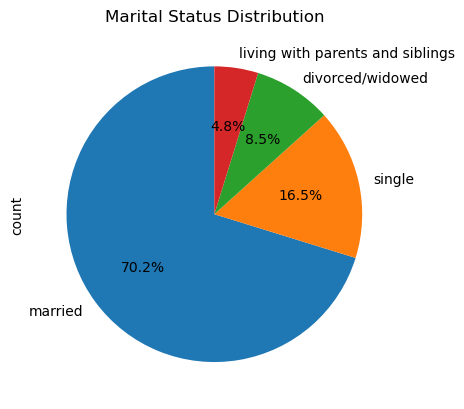

In [94]:
# Pie chart showing the distribution of martial status
martial_status = (
    ords_prods_cust_excluded["marital_status"]
    .value_counts()
    .plot.pie(autopct="%1.1f%%", startangle=90, title="Marital Status Distribution")
)

# Export the pie chart
martial_status.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "martial_status_pie_chart.png")
)

#### Distribution of Age groups

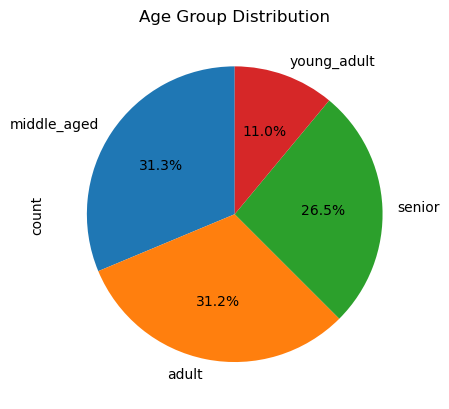

In [95]:
# pie chart showing the distribution of age groups
age_group = (
    ords_prods_cust_excluded["age_group"]
    .value_counts()
    .plot.pie(autopct="%1.1f%%", startangle=90, title="Age Group Distribution")
)

# export the pie chart
age_group.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "age_group_pie_chart.png")
)

#### Distribution of region

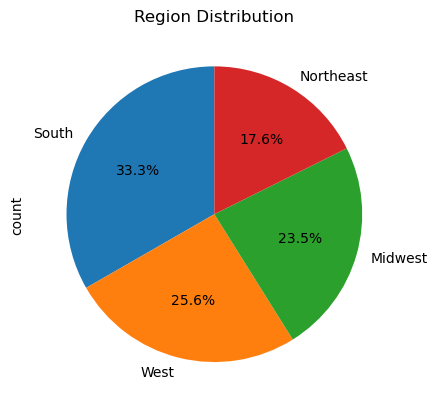

In [96]:
# Pie chart showing the distribution of region
region = (
    ords_prods_cust_excluded["region"]
    .value_counts()
    .plot.pie(autopct="%1.1f%%", startangle=90, title="Region Distribution")
)

# Export the pie chart
region.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "region_pie_chart.png")
)

#### Number having dependants

In [97]:
# check the new column value count
ords_prods_cust_excluded["dependants_group"].value_counts()

dependants_group
dependants       23224883
no_dependants     7739681
Name: count, dtype: int64

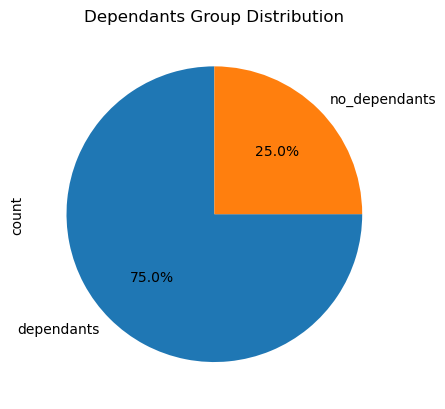

In [98]:
# create a pie chart with results
dependants_group = (
    ords_prods_cust_excluded["dependants_group"]
    .value_counts()
    .plot.pie(autopct="%1.1f%%", startangle=90, title="Dependants Group Distribution")
)

In [99]:
# Export the pie chart
dependants_group.figure.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "dependants_group_pie_chart.png"
    )
)

#### Dependents vs department preferences

## 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [100]:
# Group by customer profile columns and aggregate usage frequency and expenditure
customer_profile_agg = (
    ords_prods_cust_excluded.groupby(
        [
            "user_id",
            "gender",
            "state",
            "region",
            "number_of_dependants",
            "marital_status",
            "age_group",
            "loyalty_flag",
            "order_frequency_flag",
            "dependants_group",
            "income_group",
            "spending_flag",
        ]
    )
    .agg(
        {
            "order_number": ["max", "mean", "min"],  # Usage frequency
            "prices": ["max", "mean", "min"],  # Expenditure
        }
    )
    .reset_index()
)

# Rename the columns for clarity
customer_profile_agg.columns = [
    "_".join(col).strip().rstrip("_") for col in customer_profile_agg.columns.values
]

# Display the resulting DataFrame
customer_profile_agg.head()

,user_id,gender,state,region,number_of_dependants,marital_status,age_group,loyalty_flag,order_frequency_flag,dependants_group,income_group,spending_flag,order_number_max,order_number_mean,order_number_min,prices_max,prices_mean,prices_min
0,1,Female,Alabama,South,3,married,adult,New customer,Frequent customer,dependants,low_income,Low spender,10,5.813559,1,14.0,6.367797,1.0
1,2,Female,Alaska,West,3,married,senior,Regular customer,Regular customer,dependants,middle_income,Low spender,14,8.035897,1,14.8,7.515897,1.3
2,3,Female,Arizona,West,3,married,adult,Regular customer,Infrequent customer,dependants,middle_income,Low spender,12,6.000000,1,14.4,8.197727,1.3
3,4,Male,Arkansas,South,3,married,adult,New customer,Regular customer,dependants,low_income,Low spender,5,2.888889,1,14.6,8.205556,1.4
4,7,Male,Connecticut,Northeast,2,married,adult,Regular customer,Infrequent customer,dependants,middle_income,Low spender,20,9.645631,1,23.2,7.466990,1.1


## Export and cleaning

In [101]:
# drop _merge column
ords_prods_cust_excluded.drop(columns="_merge", inplace=True)

In [102]:
# Export the new dataframe
ords_prods_cust_excluded.to_pickle(
    os.path.join(
        path,
        "02 Data",
        "Prepared Data",
        "ords_prods_customers_department_merged_excluded_V2.pkl",
    )
)